# GLM via SKLearn

Please email: Joshua_Zimmer@hms.harvard.edu with questions

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('./backend')

import sglm
import sklearn.linear_model
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Normal (OLS)

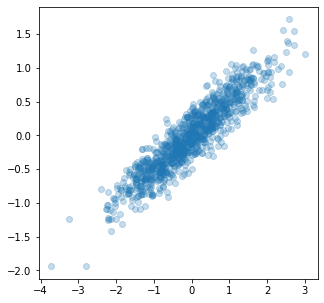

In [3]:
norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = (true_y + norm.rvs(size=1000)*0.2)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [4]:
# glm = sglm.GLM('Normal')
# glm = sklearn.linear_model.LinearRegression()
glm = sglm.GLM('Normal', alpha=0)
glm.fit(x, y)
coef, intercept = glm.model.coef_, glm.model.intercept_
coef, intercept

(array([0.49136692]), 0.001466541084303236)

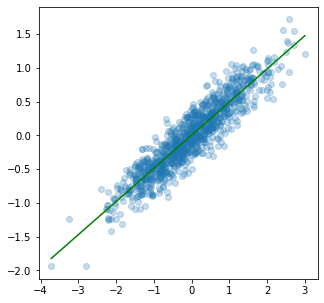

In [5]:
view_x = np.linspace(x.min(), x.max(), num=100)
view_y = view_x*coef + intercept
obs_y = (true_y + norm.rvs(size=1000)*0.)

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')

# Poisson

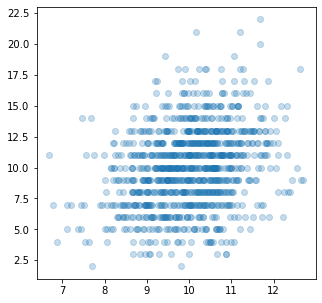

In [6]:
true_x = norm.rvs(size=1000) + 10
true_y = true_x
obs_y = np.array([stats.poisson(mu=_).rvs(1) for _ in true_x]).reshape(-1)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [7]:
glm = sglm.GLM('Poisson', alpha=0, link='identity')
glm.fit(x, y)
coef, intercept = glm.model.coef_, glm.model.intercept_
coef, intercept

(array([0.95327895]), 0.47384252444702046)

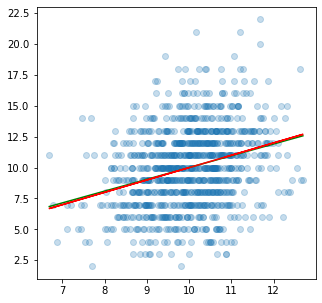

In [8]:
view_x = np.linspace(x.min(), x.max(), num=100)
# view_y = np.exp(view_x*coef + intercept)
view_y = view_x*coef + intercept

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')
plt.plot(true_x, np.squeeze(true_y), color='r')

# Logistic

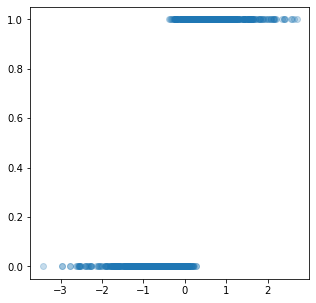

In [9]:
norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = ((true_y + norm.rvs(size=1000)*0.1) > 0)*1.0

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [10]:
glm = sglm.GLM('Logistic')
glm.fit(x, y)
coef, intercept = glm.model.coef_, glm.model.intercept_
coef, intercept

(array([[6.1728339]]), array([0.05076213]))

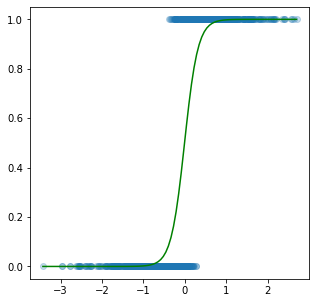

In [11]:
view_x = np.linspace(x.min(), x.max(), num=100)
view_y = 1/(1+np.exp(-(view_x*coef + intercept)))

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')